In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-super-store-dataset/Global_Superstore2.xlsx

/kaggle/input/global-super-store-dataset/Global_Superstore2.csv

I used this dataset to try my algorithm, so I left you with this notebook as a token of my gratitude.

This notebook showing bellow customers analysis.

* Customers Analysis
1.Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer.

2.Do the high frequent customers are contributing more revenue.

3.Which customer segment is most profitable in each year.


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Global_Superstore2.csv',encoding='cp850')

In [ ]:
df['Order Year'] = df['Order Date'].str[-4:]
df['Order Month'] = df['Order Date'].str[3:5]

df['Product Category'] = df['Category'].str.cat(df['Sub-Category'].astype('str'), sep='-')

1. Calculate frequency of purchase for each customer

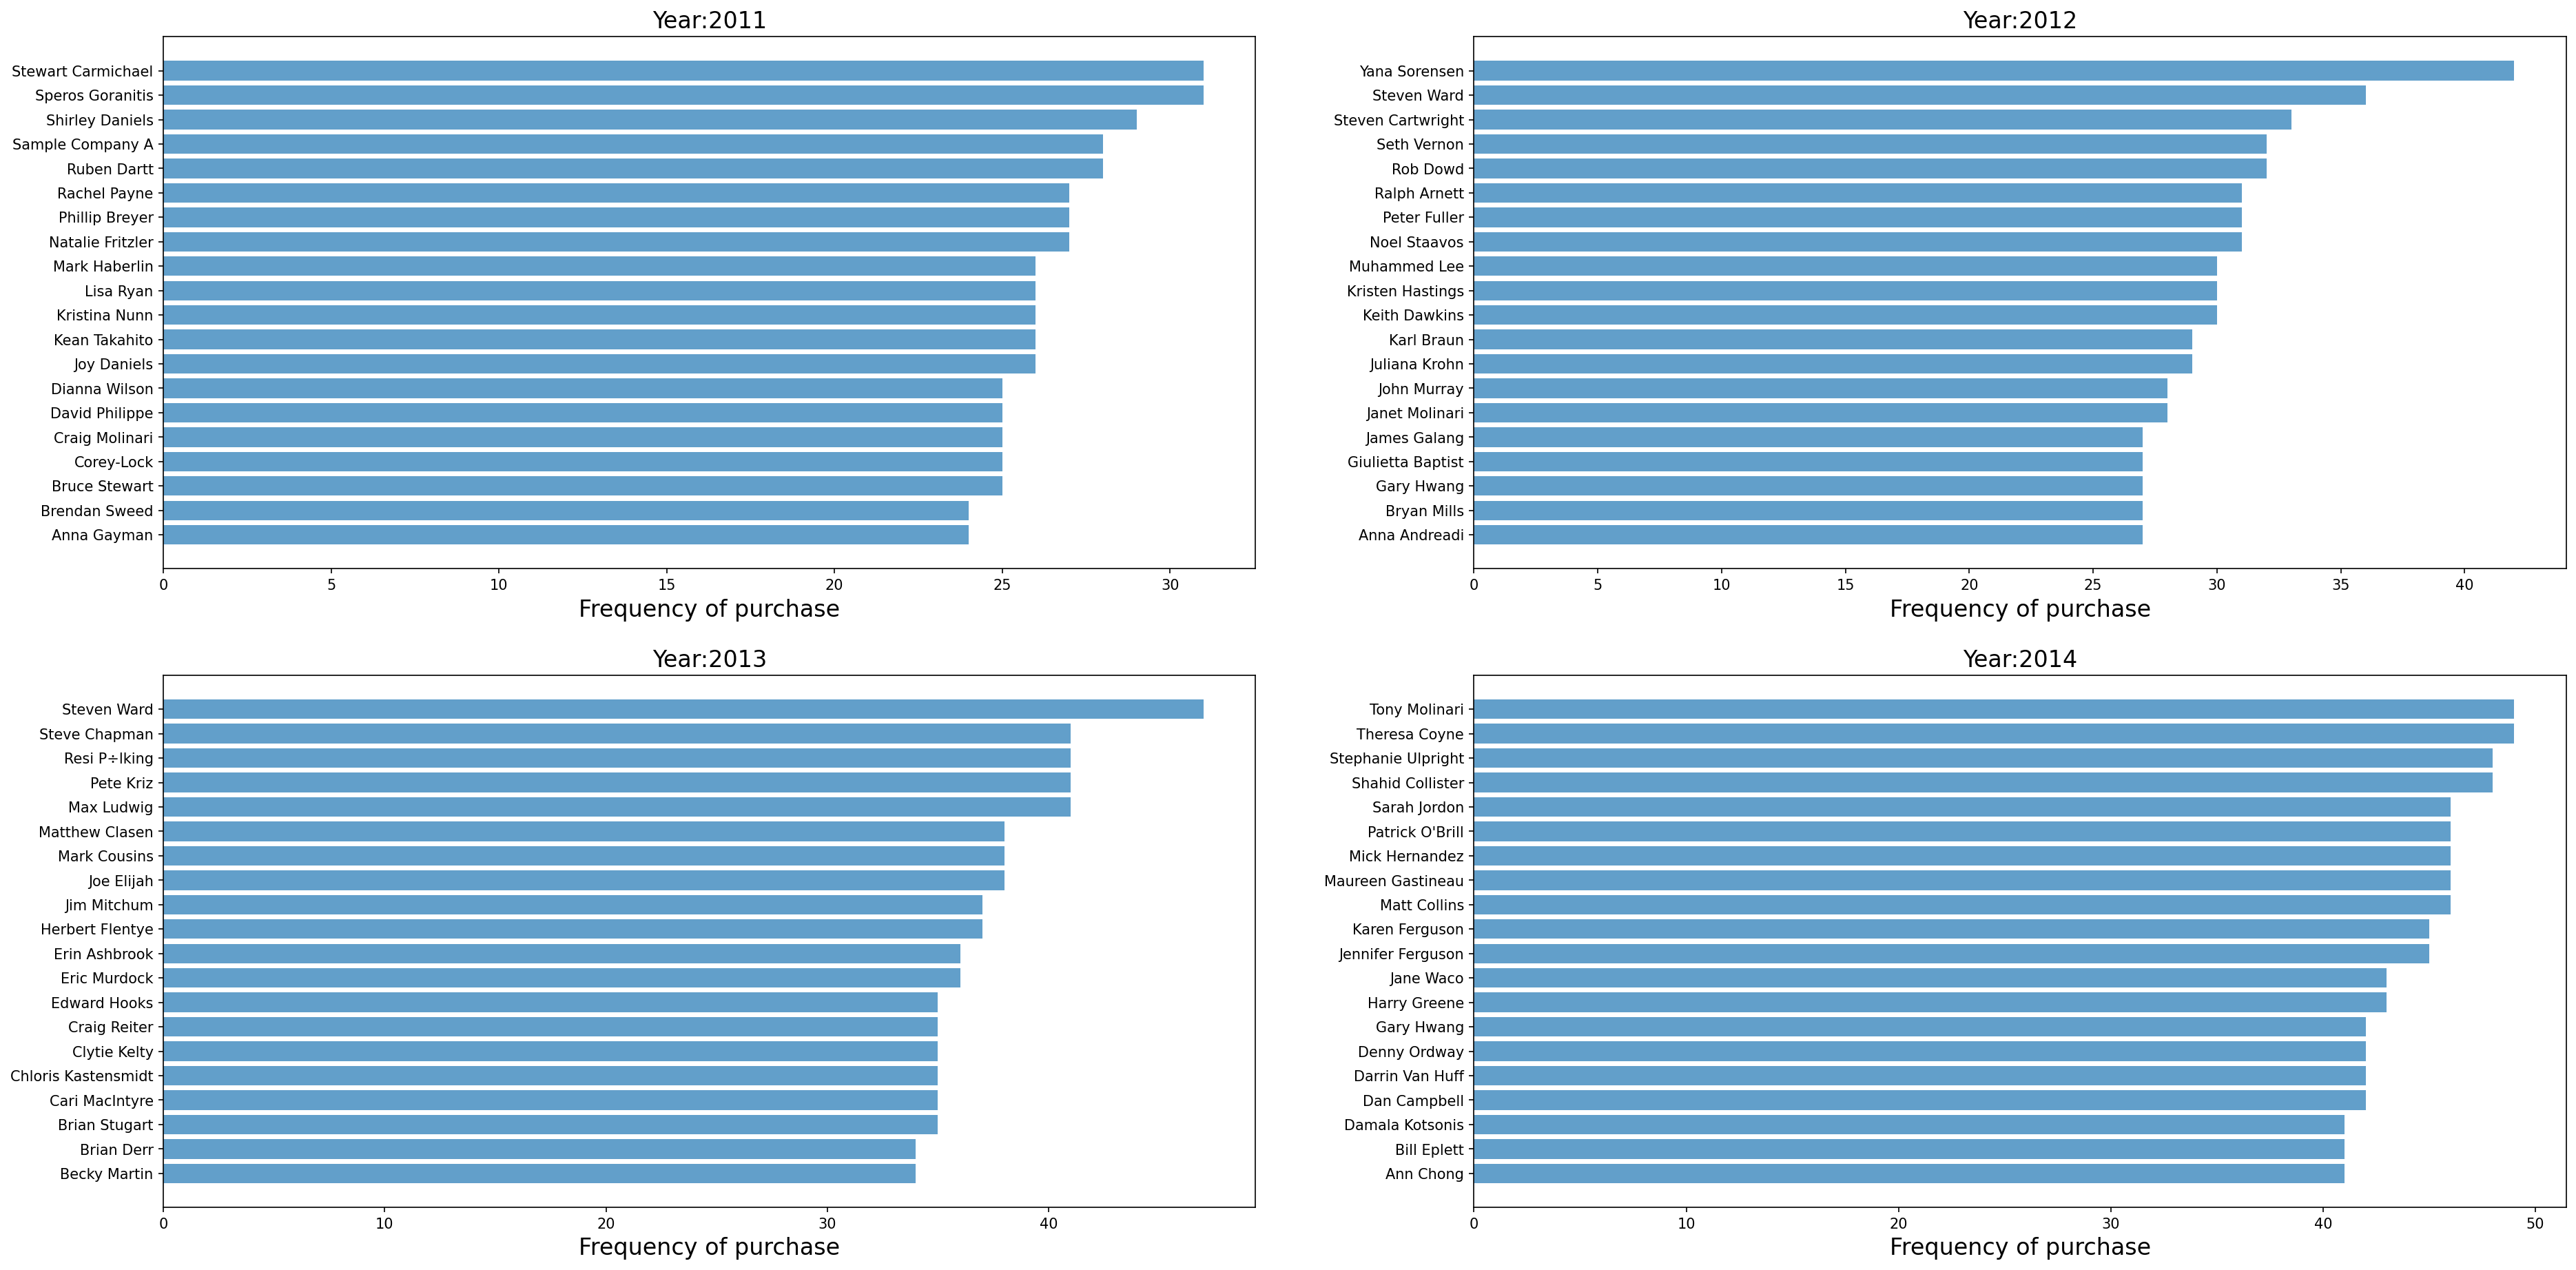

In [ ]:
Top = 20 

df_purchase_cnt = df.groupby(['Customer Name','Order Year']).count().reset_index()
year_arr = np.sort(df_purchase_cnt['Order Year'].unique())

fig, axes = plt.subplots(2,2,figsize=(30,15),dpi=150)

for i in range(len(year_arr)):
    df_purchase_cnt_by_year = df_purchase_cnt[df_purchase_cnt['Order Year']==year_arr[i]].sort_values(by='Row ID',ascending=False).reset_index(drop=True)
    # visualize
    axes[i//2][i%2].barh(df_purchase_cnt_by_year.loc[:Top-1,'Customer Name'].sort_values(),df_purchase_cnt_by_year.loc[:Top-1,'Row ID'].sort_values(),alpha=0.7)
    axes[i//2][i%2].set_title('Year:'+year_arr[i],size=16)
    axes[i//2][i%2].set_xlabel('Frequency of purchase',size=16)


2.Do the high frequent customers are contributing more revenue

In [ ]:
Top = 20
df_profit_mean = df.groupby(['Customer Name','Order Year']).mean().reset_index()
for i in range(len(year_arr)):
    df_purchase_cnt_by_year = df_purchase_cnt[df_purchase_cnt['Order Year']==year_arr[i]].sort_values(by='Row ID',ascending=False).reset_index(drop=True)
    df_profit_mean_by_year = df_profit_mean[df_profit_mean['Order Year']==year_arr[i]].sort_values(by='Profit',ascending=False).reset_index(drop=True)
    # Calculating profit Avg. ranking #Top% by year
    Top_rate = []
    for t in range(Top):
        Top_rate.append(round(100*df_profit_mean_by_year[df_profit_mean_by_year['Customer Name']==df_purchase_cnt_by_year.loc[t,'Customer Name']].index[0]/len(df_profit_mean_by_year)))
    print('==============Year:',year_arr[i],'==============')
    display(pd.DataFrame.from_dict({'Customer Name':df_purchase_cnt_by_year.loc[:19,'Customer Name'].to_list(),'Profit Avg. Ranking #Top%':Top_rate}))

==============Year: 2011 ==============


,Customer Name,Profit Avg. Ranking #Top%
0,David Philippe,70
1,Kean Takahito,79
2,Kristina Nunn,46
3,Phillip Breyer,26
4,Brendan Sweed,36
5,Craig Molinari,58
6,Dianna Wilson,33
7,Joy Daniels,97
8,Rachel Payne,70
9,Natalie Fritzler,55


==============Year: 2012 ==============


,Customer Name,Profit Avg. Ranking #Top%
0,Rob Dowd,40
1,Karl Braun,63
2,Juliana Krohn,47
3,Ralph Arnett,15
4,Peter Fuller,91
5,Steven Cartwright,35
6,Gary Hwang,55
7,Kristen Hastings,71
8,Noel Staavos,57
9,Muhammed Lee,19


==============Year: 2013 ==============


,Customer Name,Profit Avg. Ranking #Top%
0,Pete Kriz,75
1,Mark Cousins,63
2,Jim Mitchum,39
3,Steve Chapman,71
4,Steven Ward,39
5,Clytie Kelty,26
6,Herbert Flentye,94
7,Brian Stugart,37
8,Cari MacIntyre,37
9,Becky Martin,61


==============Year: 2014 ==============


,Customer Name,Profit Avg. Ranking #Top%
0,Stephanie Ulpright,78
1,Shahid Collister,41
2,Bill Eplett,3
3,Dan Campbell,83
4,Darrin Van Huff,75
5,Denny Ordway,11
6,Harry Greene,65
7,Ann Chong,64
8,Jane Waco,2
9,Sarah Jordon,14


3. Which customer segment is most profitable in each year

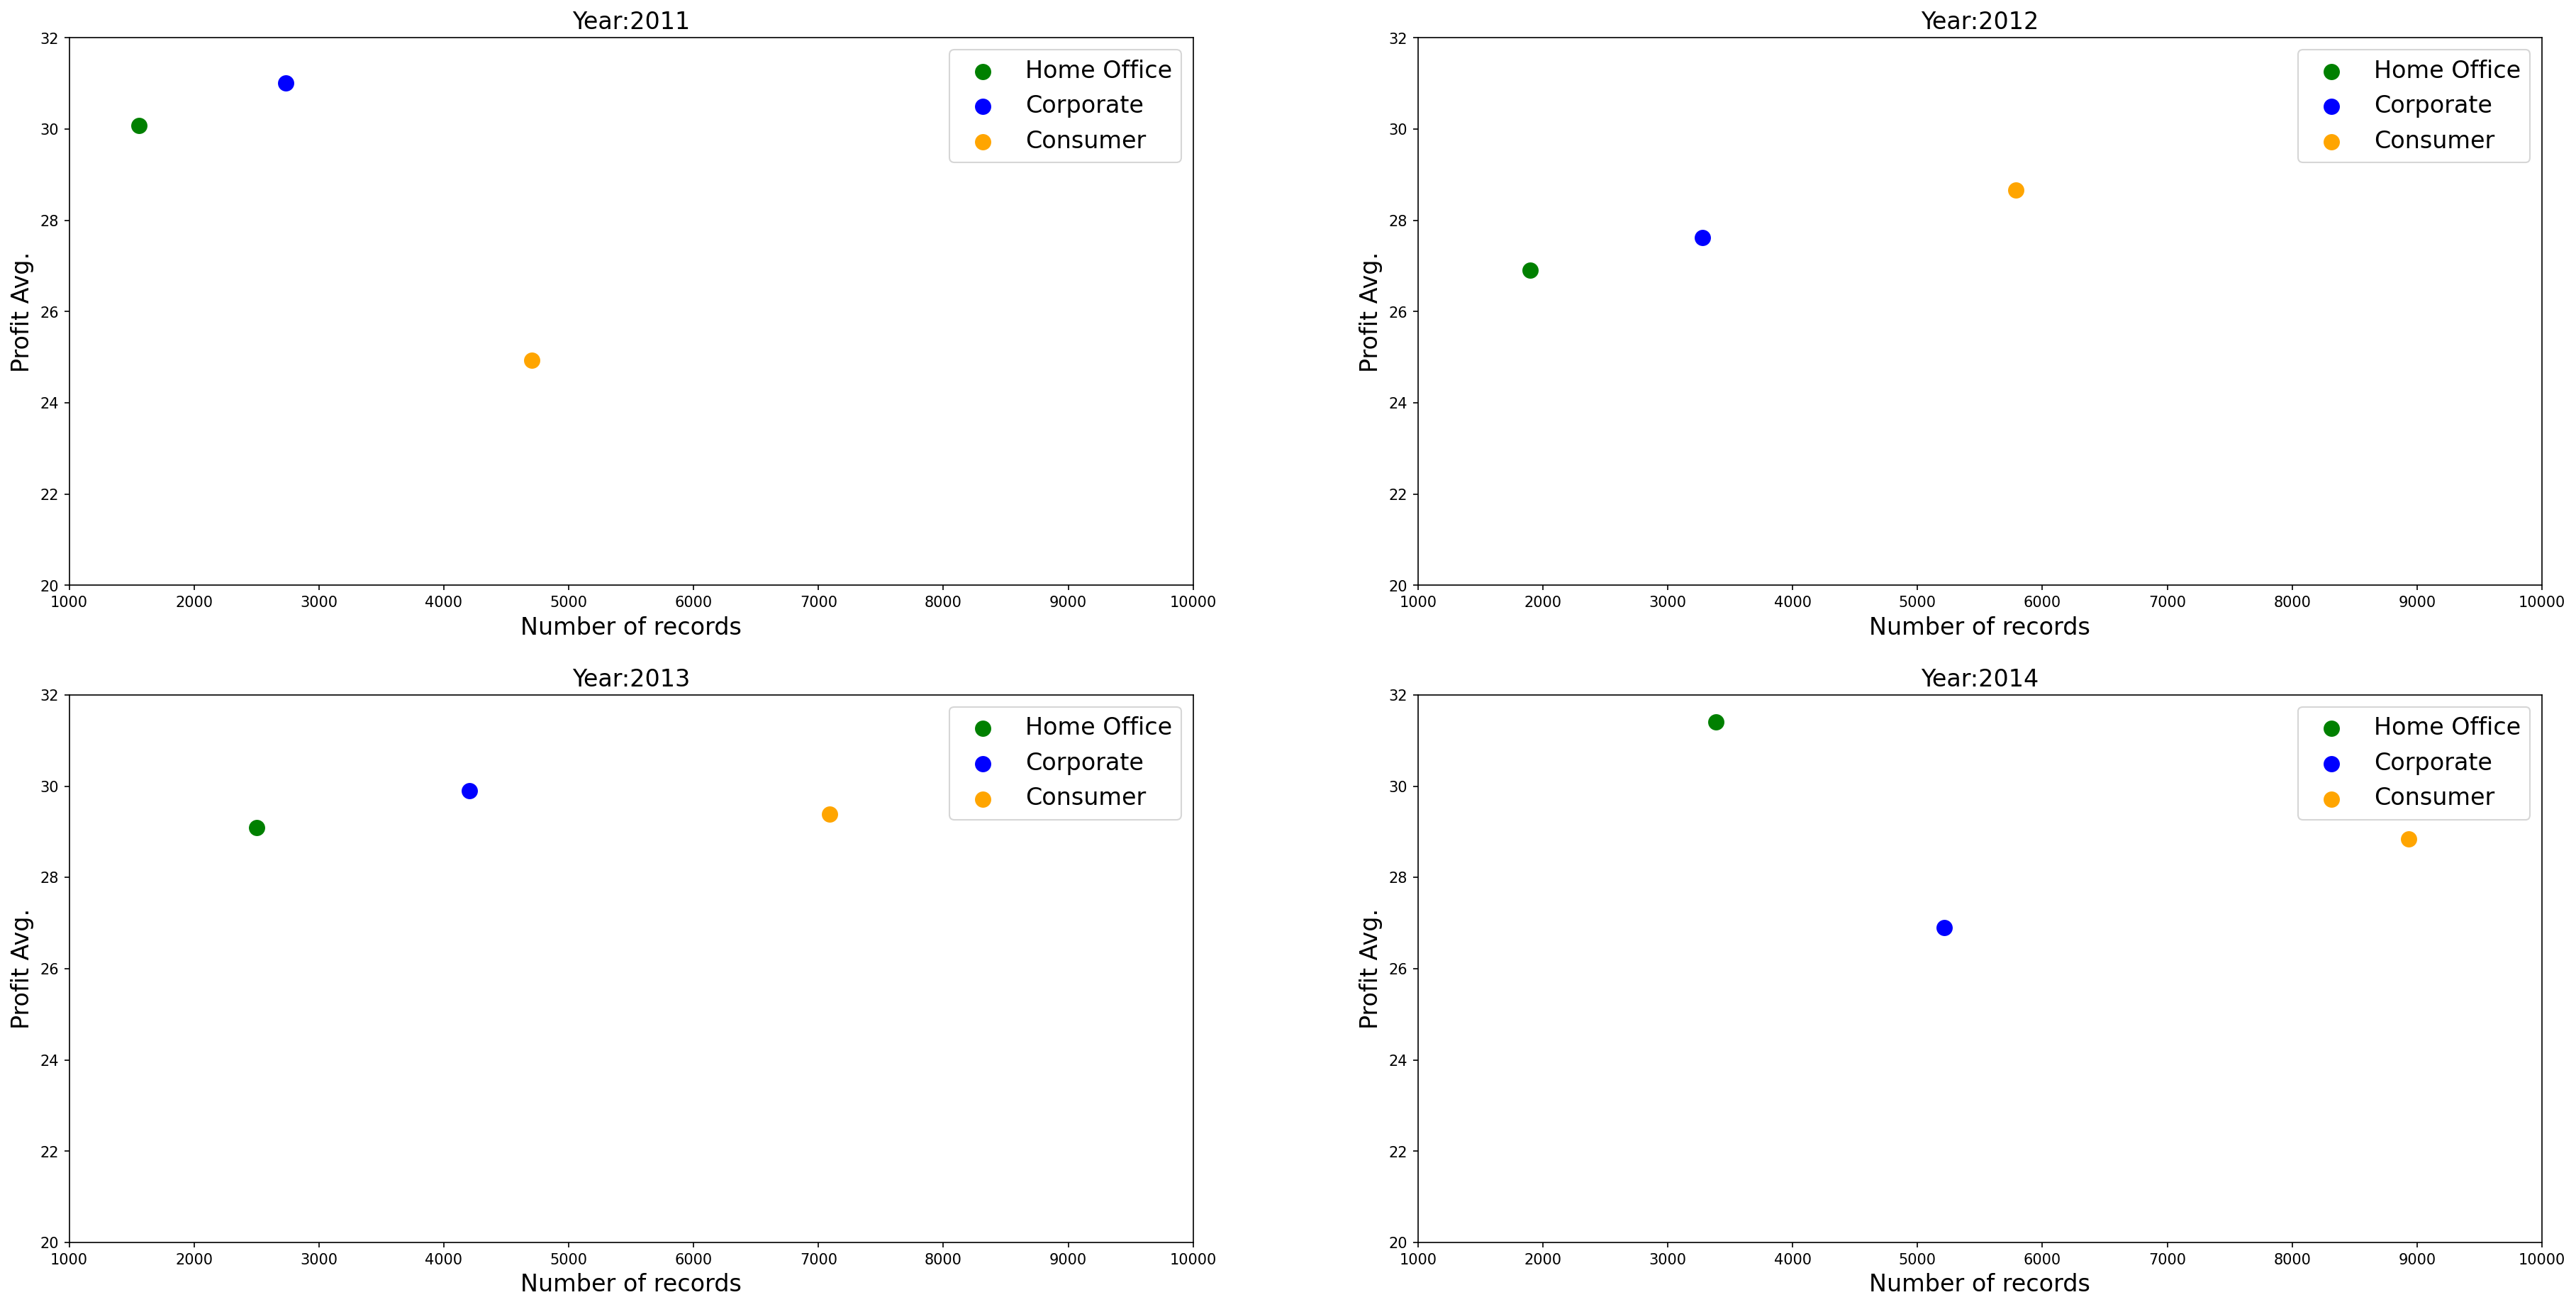

In [ ]:
df_profit_mean_by_seg = df.groupby(['Segment','Order Year']).mean().reset_index()
df_purchase_cnt_by_seg = df.groupby(['Segment','Order Year']).count().reset_index()

fig, axes = plt.subplots(2,2,figsize=(30,15),dpi=150)
color = ['green','blue','orange']
for i in range(len(year_arr)):
    df_profit_mean_by_seg_by_year = df_profit_mean_by_seg[df_profit_mean_by_seg['Order Year']==year_arr[i]].sort_values(by='Segment',ascending=False).reset_index(drop=True)
    df_purchase_cnt_by_seg_by_year = df_purchase_cnt_by_seg[df_purchase_cnt_by_seg['Order Year']==year_arr[i]].sort_values(by='Segment',ascending=False).reset_index(drop=True)
    # Visualize
    Seg_lst = df_profit_mean_by_seg_by_year['Segment'].to_list()
    for s in range(len(Seg_lst)):
        df_temp_cnt = df_purchase_cnt_by_seg_by_year[df_purchase_cnt_by_seg_by_year['Segment']==Seg_lst[s]]
        df_temp_mean = df_profit_mean_by_seg_by_year[df_profit_mean_by_seg_by_year['Segment']==Seg_lst[s]]
        axes[i//2][i%2].scatter(df_temp_cnt['Row ID'],df_temp_mean['Profit'],label=Seg_lst[s],color=color[s],s=100)
        
    axes[i//2][i%2].set_title('Year:'+year_arr[i],size=16)
    axes[i//2][i%2].set_xlabel('Number of records',size=16)
    axes[i//2][i%2].set_ylabel('Profit Avg.',size=16)
    axes[i//2][i%2].set_xlim(1000,10000)
    axes[i//2][i%2].set_ylim(20,32)
    axes[i//2][i%2].legend(fontsize=16)

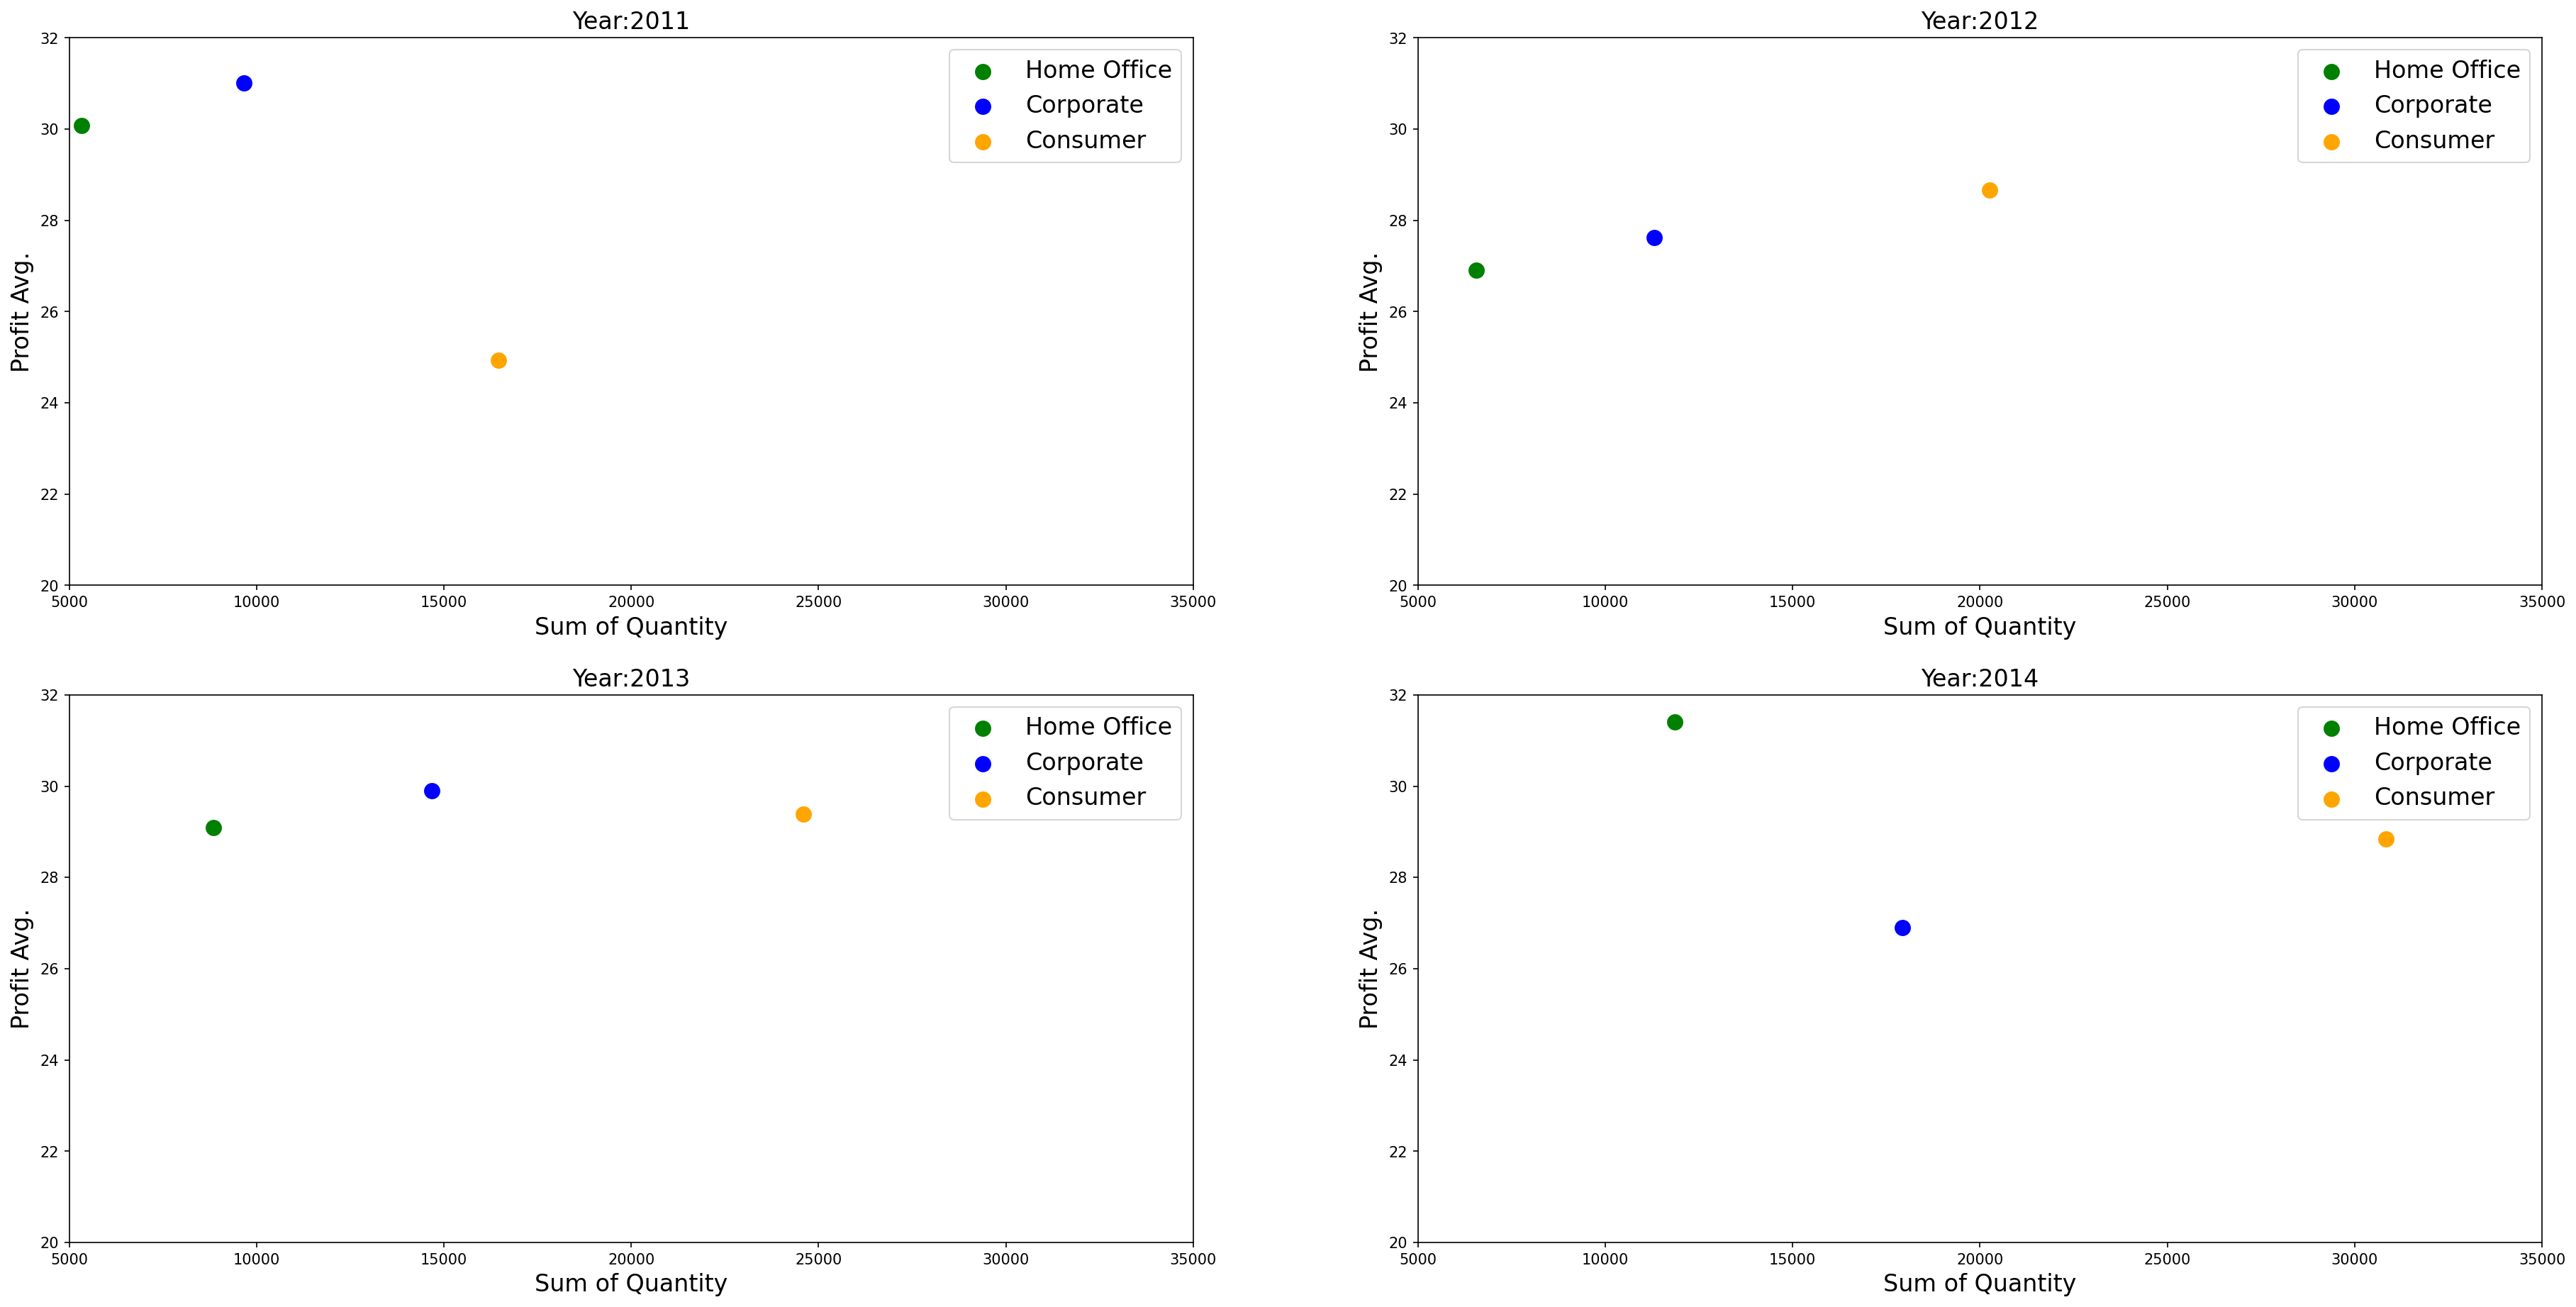

In [ ]:
df_purchase_sum_by_seg = df.groupby(['Segment','Order Year']).sum().reset_index()

fig, axes = plt.subplots(2,2,figsize=(30,15),dpi=150)
color = ['green','blue','orange']
for i in range(len(year_arr)):
    df_profit_mean_by_seg_by_year = df_profit_mean_by_seg[df_profit_mean_by_seg['Order Year']==year_arr[i]].sort_values(by='Segment',ascending=False).reset_index(drop=True)
    df_purchase_sum_by_seg_by_year = df_purchase_sum_by_seg[df_purchase_sum_by_seg['Order Year']==year_arr[i]].sort_values(by='Segment',ascending=False).reset_index(drop=True)
    # Visualize
    Seg_lst = df_profit_mean_by_seg_by_year['Segment'].to_list()
    for s in range(len(Seg_lst)):
        df_temp_sum = df_purchase_sum_by_seg_by_year[df_purchase_sum_by_seg_by_year['Segment']==Seg_lst[s]]
        df_temp_mean = df_profit_mean_by_seg_by_year[df_profit_mean_by_seg_by_year['Segment']==Seg_lst[s]]
        axes[i//2][i%2].scatter(df_temp_sum['Quantity'],df_temp_mean['Profit'],label=Seg_lst[s],color=color[s],s=100)
        
    axes[i//2][i%2].set_title('Year:'+year_arr[i],size=16)
    axes[i//2][i%2].set_xlabel('Sum of Quantity',size=16)
    axes[i//2][i%2].set_ylabel('Profit Avg.',size=16)
    axes[i//2][i%2].set_xlim(5000,35000)
    axes[i//2][i%2].set_ylim(20,32)
    axes[i//2][i%2].legend(fontsize=16)